# 1. Import Libraries

In [319]:
import numpy as np
import pandas as pd
import missingno as msn

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as plx

import warnings
warnings.filterwarnings('ignore')

# 2. Read Data

> takehome_users.csv

In [320]:
df1 = pd.read_csv('takehome_users.csv', encoding='latin-1')
pd.set_option('display.max_columns', None)
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [321]:
df1.shape

(12000, 10)

In [322]:
df1.info() # last_session_creation_time & invited_by_user_id have empty cells

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [323]:
df1.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


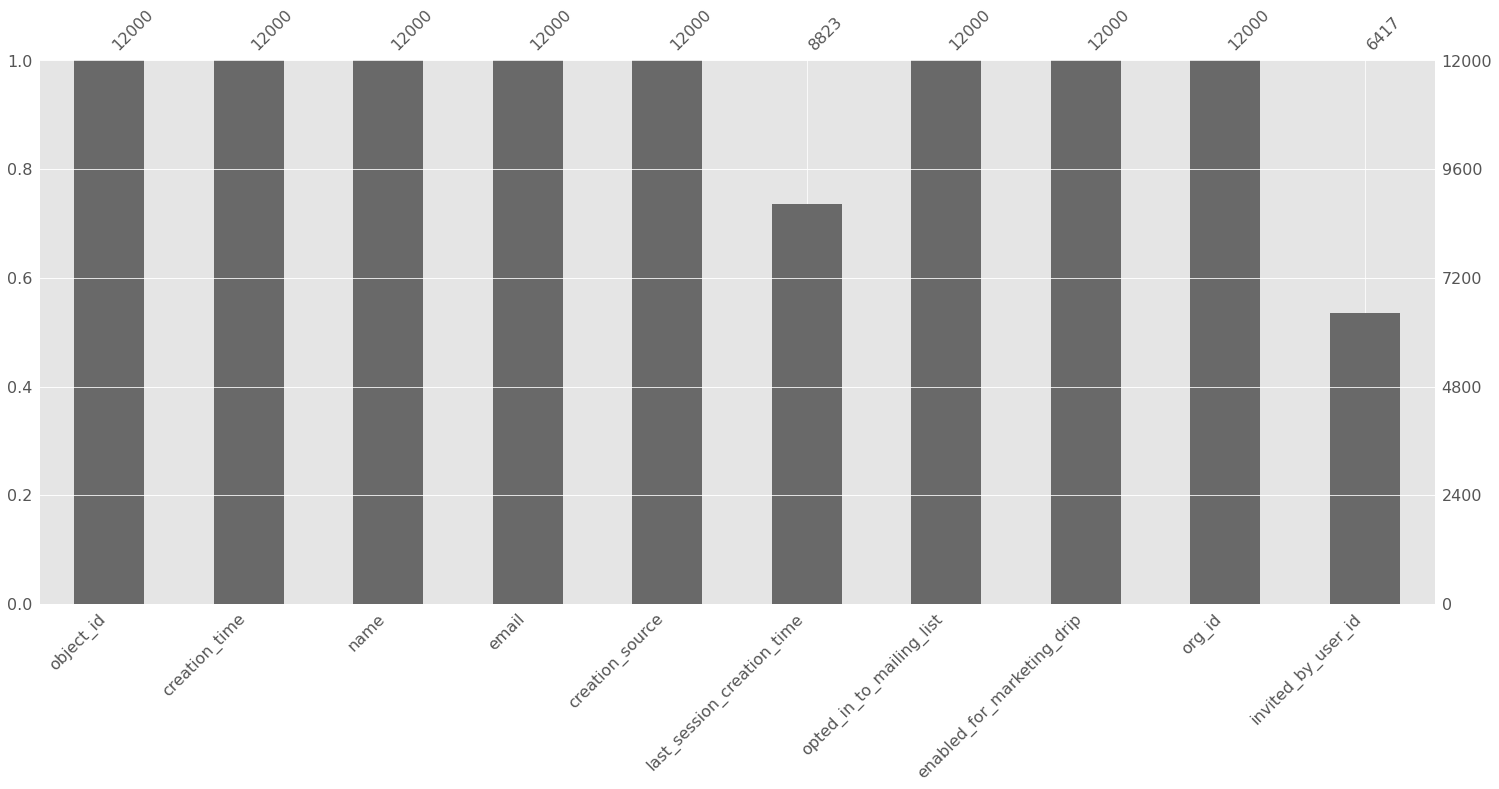

In [324]:
plt.figure(figsize=(10, 5))
# msn.matrix(df1)
msn.bar(df1) # Missing datas
plt.show()

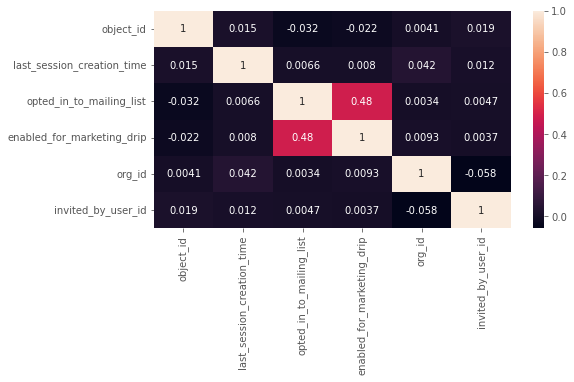

In [325]:
plt.figure(figsize=(8,4))
sns.heatmap(df1.corr(), annot=True)
plt.show()

> takehome_user_engagement.csv

In [326]:
df2 = pd.read_csv('takehome_user_engagement.csv')
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [327]:
df2.shape

(207917, 3)

In [328]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [329]:
df2.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [330]:
df2.corr()

,user_id,visited
user_id,1.0,NaN
visited,NaN,NaN


In [331]:
df2.nunique()

time_stamp    207220
user_id         8823
visited            1
dtype: int64

## Observation
-----------------
1. In df1, their are correlation between features which are over 5%.
2. opted_in_to_mailing_list and enabled_for_marketing_drip have correlation of 48%
3. org_id & invited_by_user_id have 2.8% correlation.
4. df2 have no correlation features.

# Pre-Processing

## df1 Column-wise

In [332]:
df1.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

object_id

In [333]:
print(df1.object_id.nunique(), df1.object_id.dtype)

12000 int64


In [334]:
df1.object_id.isnull().sum()

0

creation_time

In [335]:
print(df1.creation_time.nunique(), df1.creation_time.dtype)

11996 object


In [336]:
df1.creation_time = pd.to_datetime(df1.creation_time)
print(df1.creation_time.dtype)

datetime64[ns]


In [337]:
df1.creation_time.isnull().sum()

0

name

In [338]:
df1.name.nunique()

11349

In [339]:
df1.name.duplicated().sum()

651

In [340]:
df1.name.isnull().sum()

0

email

In [341]:
df1.email.nunique()

11980

In [342]:
df1.email.duplicated().sum()

20

In [343]:
df1.email.isnull().sum()

0

In [344]:
df1.email = df1.email.str.lower()

creation_source

In [345]:
df1.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [346]:
df1.creation_source.isnull().sum()

0

last_session_creation_time

In [347]:
df1.last_session_creation_time.value_counts()

1.401868e+09    2
1.401917e+09    2
1.398139e+09    1
1.381812e+09    1
1.400737e+09    1
               ..
1.393803e+09    1
1.343116e+09    1
1.382131e+09    1
1.373158e+09    1
1.390727e+09    1
Name: last_session_creation_time, Length: 8821, dtype: int64

In [348]:
df1.last_session_creation_time = pd.to_datetime(df1.last_session_creation_time, unit='s')
df1.last_session_creation_time.head()

0   2014-04-22 03:53:30
1   2014-03-31 03:45:04
2   2013-03-19 23:14:52
3   2013-05-22 08:09:28
4   2013-01-22 10:14:20
Name: last_session_creation_time, dtype: datetime64[ns]

In [349]:
df1.last_session_creation_time.fillna(df1.creation_time, inplace=True)

In [350]:
df1.last_session_creation_time.isnull().sum()

0

opted_in_to_mailing_list

In [351]:
df1.opted_in_to_mailing_list.value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

In [352]:
df1.opted_in_to_mailing_list.isnull().sum()

0

enabled_for_marketing_drip

In [353]:
df1.enabled_for_marketing_drip.value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

In [354]:
df1.enabled_for_marketing_drip.isnull().sum()

0

org_id

In [355]:
df1.org_id.isnull().sum()

0

In [356]:
df1.org_id.nunique()

417

invited_by_user_id

In [357]:
df1.invited_by_user_id.isnull().sum()

5583

In [358]:
# df1.invited_by_user_id = df1.invited_by_user_id.replace(np.nan, 0)

In [359]:
# df1.invited_by_user_id = df1.invited_by_user_id.astype('int')

In [360]:
df1.invited_by_user_id.value_counts()

10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
           ..
1390.0      1
5445.0      1
8526.0      1
4695.0      1
5450.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64

In [361]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,augustcclausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,mitchellbottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,nicklassclausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,graceraw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


## df2 Column-wise

In [362]:
print(df2.columns, df2.shape)

Index(['time_stamp', 'user_id', 'visited'], dtype='object') (207917, 3)


time_stamp

In [363]:
print(df2.time_stamp.nunique(), df2.time_stamp.dtype)

207220 object


In [364]:
df2.time_stamp = pd.to_datetime(df2.time_stamp)
print(df2.time_stamp.dtype)

datetime64[ns]


In [365]:
df2.time_stamp.isnull().sum()

0

user_id

In [366]:
print(df2.user_id.nunique(), df2.user_id.dtype)

8823 int64


In [367]:
df2.user_id.isnull().sum()

0

visited

In [368]:
print(df2.visited.value_counts(), df2.visited.dtype)

1    207917
Name: visited, dtype: int64 int64


In [369]:
df2.visited.isnull().sum()

0

In [370]:
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


## Merge DataFrame df1 & df2

In [371]:
# We will merge data on object_id, so lets rename user_id in df2 to object_id
# df2.rename(columns={'user_id':'object_id'}, inplace=True)
# df2.head()

In [372]:
# df = pd.merge(df1, df2, how='outer', on='object_id')
# df.head()

In [373]:
# df[df.object_id == 2].head(10) #Checking object_id = 2 details

In [374]:
# df.shape

In [375]:
# df.isnull().sum()

In [376]:
# df = df.replace(np.nan, 0)
# df.shape

In [377]:
# df.drop_duplicates(inplace=True)
# df.shape

In [378]:
# df.describe()

### Save Cleaned df

In [379]:
# df.to_csv('takehome_cleaned_df.csv')

In [380]:
# df.head()

## Observation
-----------------
1. object_id, creation_time, name, email, creation_source, opted_in_to_mailing_list, enabled_for_marketing_drip, org_id, time_stamp, user_id, visited doesn't have any null values.
2. email column text have been converted to lower case.
3. last_session_creation_time column null values replaced with creation_time.
4. creation_time, last_session_creation_time columns datatype changed to datetime type.
5. invited_by_user_id null values replaced with zero.
6. user_id is replaced with object_id. And df dataframe is created by merging df1 & df2 using object_id as common column.

# 3. Feature Engineering

## Account Creation Year & Month

In [381]:
df1['creation_year'] = df1.creation_time.dt.year
df1['creation_month'] = df1.creation_time.dt.month

In [382]:
new_order = ['object_id', 'creation_time', 'creation_year', 'creation_month', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id']
df1 = df1.reindex(columns=new_order)
df1.head()

,object_id,creation_time,creation_year,creation_month,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,2014,4,Clausen August,augustcclausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,2013,11,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,2013,3,Bottrill Mitchell,mitchellbottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,2013,5,Clausen Nicklas,nicklassclausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,2013,1,Raw Grace,graceraw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


## User Login Year-Month-Week-Time data

In [383]:
df2['year'] = df2.time_stamp.dt.year
df2['month'] = df2.time_stamp.dt.month
df2['year_week'] = df2.time_stamp.dt.strftime('%Y-%W')
df2['time'] = df2.time_stamp.dt.strftime('%H.%M')

In [384]:
new_order = ['time_stamp', 'year', 'month', 'time', 'year_week', 'user_id', 'visited']
df2 = df2.reindex(columns=new_order)
df2.head()

,time_stamp,year,month,time,year_week,user_id,visited
0,2014-04-22 03:53:30,2014,4,03.53,2014-16,1,1
1,2013-11-15 03:45:04,2013,11,03.45,2013-45,2,1
2,2013-11-29 03:45:04,2013,11,03.45,2013-47,2,1
3,2013-12-09 03:45:04,2013,12,03.45,2013-49,2,1
4,2013-12-25 03:45:04,2013,12,03.45,2013-51,2,1


## Adopted User

In [385]:
# Time period function
def time_period(df):
    if df.time >= 0 and df.time < 3:
        return 'Mid Night'
    elif df.time >=3 and df.time < 6:
        return 'Early Morning'
    elif df.time >= 6 and df.time < 9:
        return 'Morning'
    elif df.time >= 9 and df.time < 12:
        return 'Late Morning'
    elif df.time >=12 and df.time < 15:
        return 'Mid Noon'
    elif df.time >= 15 and df.time < 18:
        return 'After Noon'
    elif df.time >= 18 and df.time < 21:
        return 'Evening'
    else:
        return 'Night'

In [386]:
adopted_user_df = df2.groupby(['year_week', 'user_id', 'time'])['time_stamp'].count().reset_index(name='freq')
adopted_user_df = adopted_user_df[adopted_user_df.freq >= 3]
adopted_user_df.time = adopted_user_df.time.astype('float')
adopted_user_df['time_period'] = adopted_user_df.apply(time_period, axis=1)
adopted_user_df

,year_week,user_id,time,freq,time_period
39,2012-23,1693,21.58,3,Night
96,2012-24,728,16.04,4,After Noon
177,2012-24,11764,17.40,3,After Noon
195,2012-25,1693,21.58,3,Night
223,2012-25,5297,17.32,3,After Noon
...,...,...,...,...,...
69480,2014-22,11573,8.50,3,Morning
69484,2014-22,11688,5.23,3,Early Morning
69488,2014-22,11806,9.48,3,Late Morning
69493,2014-22,11895,4.14,3,Early Morning


In [387]:
adopted_user_df.to_csv('adopted_user_df.csv')
adopted_user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33711 entries, 39 to 69495
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year_week    33711 non-null  object 
 1   user_id      33711 non-null  int64  
 2   time         33711 non-null  float64
 3   freq         33711 non-null  int64  
 4   time_period  33711 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.5+ MB


# 4. Exploratory Data Analysis

## 4.1 Account creation analysis

### 4.1.1 Account opened w.r.t Year & Month

In [388]:
df1.creation_year.unique()
# Three years of data are present

array([2014, 2013, 2012], dtype=int64)

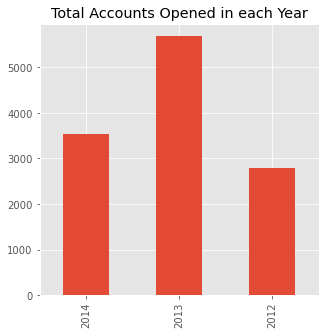

In [389]:
df1.creation_year.value_counts(sort=False).plot(kind='bar', figsize=(5,5))
plt.title('Total Accounts Opened in each Year')
plt.show()

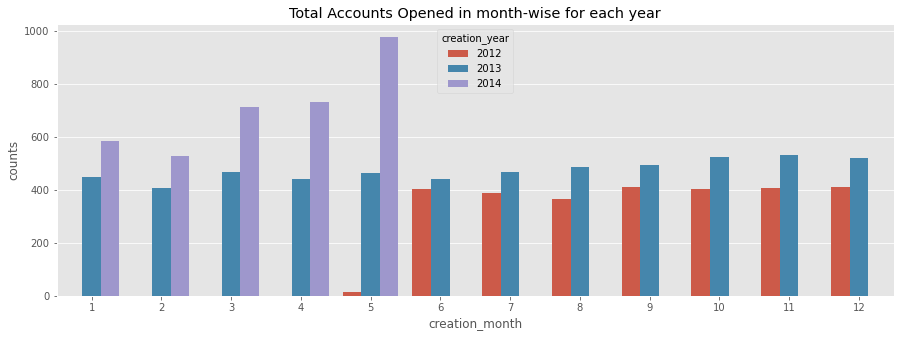

In [390]:
plt.figure(figsize=(15, 5))
cc = df1.groupby(['creation_year'])['creation_month'].value_counts().reset_index(name='counts')
sns.barplot(x=cc.creation_month, y=cc.counts, hue=cc.creation_year)
plt.title('Total Accounts Opened in month-wise for each year')
plt.show()

### 4.1.2 Acounts Opened Monthly in each Year

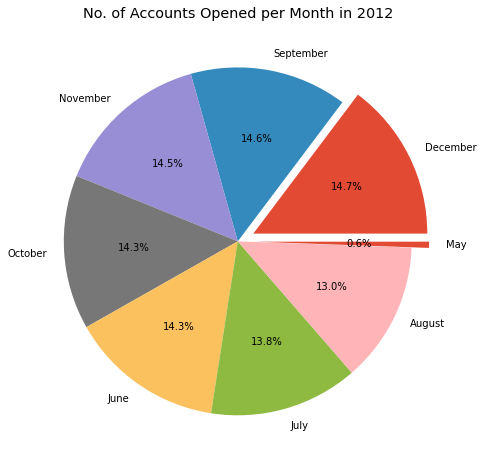

In [391]:
# YEAR 2012
df_2012 = df1[df1.creation_year==2012].creation_month.value_counts().reset_index(name='accounts_opened')
df_2012.rename(columns={'index':'creation_month_2012', 'creation_month':'accounts_opened'}, inplace=True)

plt.figure(figsize=(8, 8))
expl = [0.1, 0, 0, 0, 0, 0, 0, 0.1]
label = ['December', 'September', 'November', 'October', 'June', 'July', 'August', 'May']
plt.pie(df_2012.accounts_opened, labels = label, autopct='%1.1f%%', explode=expl)
plt.title('No. of Accounts Opened per Month in 2012')
plt.show()

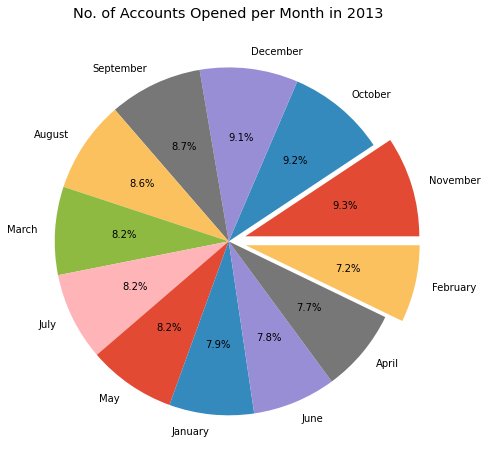

In [392]:
# YEAR 2013
df_2013 = df1[df1.creation_year==2013].creation_month.value_counts().reset_index(name='accounts_opened')
df_2013.rename(columns={'index':'creation_month_2013', 'creation_month':'accounts_opened'}, inplace=True)
# print(df_2013)
plt.figure(figsize=(8, 8))
expl = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1]
label = ['November', 'October', 'December',  'September', 'August', 'March', 'July', 'May', 'January', 'June', 'April', 'February']
plt.pie(df_2013.accounts_opened, labels = label, autopct='%1.1f%%', explode=expl)
plt.title('No. of Accounts Opened per Month in 2013')
plt.show()

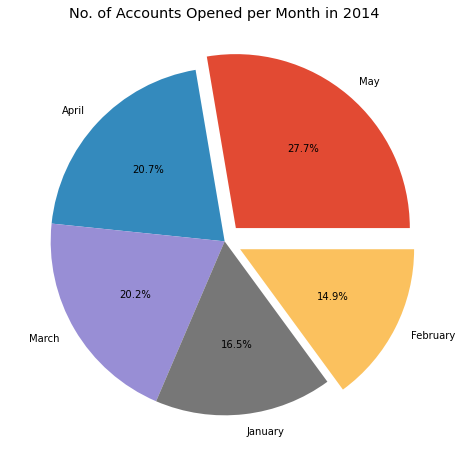

In [393]:
# YEAR 2014
df_2014 = df1[df1.creation_year==2014].creation_month.value_counts().reset_index(name='accounts_opened')
df_2014.rename(columns={'index':'creation_month_2014', 'creation_month':'accounts_opened'}, inplace=True)
# print(df_2014)
plt.figure(figsize=(8, 8))
expl = [0.1, 0, 0, 0, 0.1]
label = ['May', 'April', 'March', 'January', 'February']
plt.pie(df_2014.accounts_opened, labels = label, autopct='%1.1f%%', explode=expl)
plt.title('No. of Accounts Opened per Month in 2014')
plt.show()

### 4.1.3 Average No. of Accounts Opened Montly & Yearly

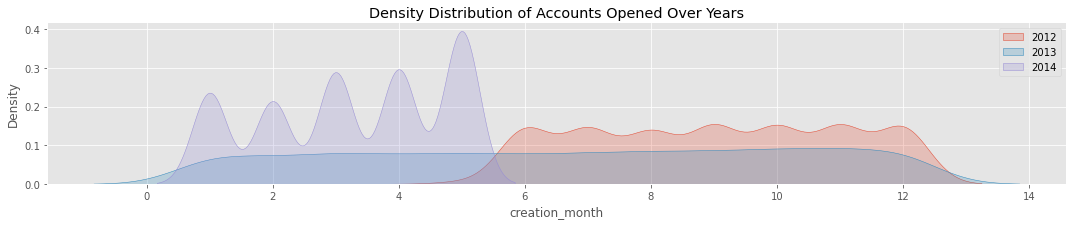

In [394]:
# Year wise account opening density distribution plot
sns.FacetGrid(df1, hue='creation_year', aspect=5).map(sns.kdeplot, 'creation_month', shade=True)
plt.title('Density Distribution of Accounts Opened Over Years')
plt.legend(labels=[2012, 2013, 2014])
plt.show()

In [395]:
# Year 2012
avg_acc_12 = df_2012.accounts_opened.sum()/df_2012.index.nunique()
avg_acc_12 = avg_acc_12/df_2012.accounts_opened.sum() *100
avg_acc_y12 = df_2012.accounts_opened.sum()/df1.shape[0] * 100
# Year 2013
avg_acc_13 = df_2013.accounts_opened.sum()/df_2013.index.nunique()
avg_acc_13 = avg_acc_13/df_2013.accounts_opened.sum() *100
avg_acc_y13 = df_2013.accounts_opened.sum()/df1.shape[0] * 100
# Year 2014
avg_acc_14 = df_2014.accounts_opened.sum()/df_2014.index.nunique()
avg_acc_14 = avg_acc_14/df_2014.accounts_opened.sum() *100
avg_acc_y14 = df_2014.accounts_opened.sum()/df1.shape[0] * 100

avg_acc_mon = [avg_acc_12, avg_acc_13, avg_acc_14]
avg_acc_year = [avg_acc_y12, avg_acc_y13, avg_acc_y14]

total_average = pd.DataFrame({'year' : [2012, 2013, 2014],
                             'avg_acc_monthly(%)': avg_acc_mon,
                             'avg_acc_yearly(%)': avg_acc_year})
total_average.round(2)


,year,avg_acc_monthly(%),avg_acc_yearly(%)
0,2012,12.50,23.31
1,2013,8.33,47.30
2,2014,20.00,29.39


In [396]:
fig = plx.bar(total_average, x='year', y=['avg_acc_monthly(%)', 'avg_acc_yearly(%)'], text_auto=True, 
              title='Average % of Accounts Opened Monthly & Yearly', template='ggplot2')
fig.update_layout(height=600, width=900, title=dict(x=0.08, y=0.95, font=dict(size=30, family='Times New Roman')))
fig.show()

### 4.1.4 Overall Monthly Increase in Account Opening

In [397]:
monthly_perform = df1.groupby(['creation_year', 'creation_month'])['creation_month'].count().reset_index(name='total_count')
monthly_perform['total_count_change_per'] = (monthly_perform.total_count.pct_change()*100).round(2)
monthly_perform.head()

,creation_year,creation_month,total_count,total_count_change_per
0,2012,5,16,NaN
1,2012,6,401,2406.25
2,2012,7,387,-3.49
3,2012,8,365,-5.68
4,2012,9,409,12.05


In [398]:
monthly_perform.describe() # avg growth rate per month is 104.57%

,creation_year,creation_month,total_count,total_count_change_per
count,25.000000,25.000000,25.000000,24.000000
mean,2012.880000,6.440000,480.000000,104.569583
std,0.725718,3.465064,165.349378,490.384095
min,2012.000000,1.000000,16.000000,-9.450000
25%,2012.000000,4.000000,407.000000,-2.567500
50%,2013.000000,6.000000,463.000000,2.005000
75%,2013.000000,9.000000,523.000000,9.387500
max,2014.000000,12.000000,976.000000,2406.250000


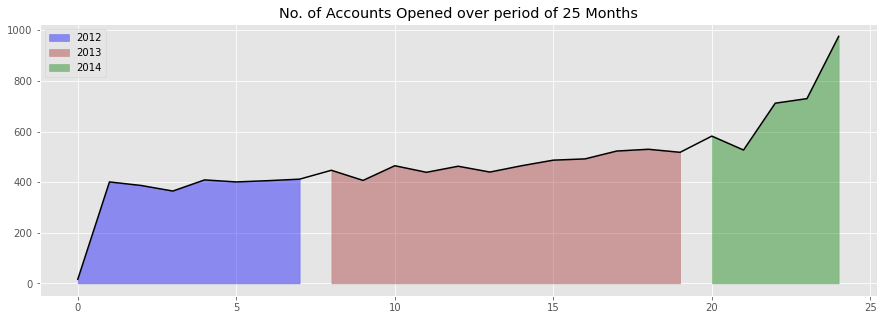

In [399]:
plt.figure(figsize=(15, 5))
plt.fill_between(monthly_perform[monthly_perform.creation_year==2012].index, 
                 monthly_perform[monthly_perform.creation_year==2012].total_count, color='blue', alpha=0.4)
plt.fill_between(monthly_perform[monthly_perform.creation_year==2013].index, 
                 monthly_perform[monthly_perform.creation_year==2013].total_count, color='brown', alpha=0.4)
plt.fill_between(monthly_perform[monthly_perform.creation_year==2014].index, 
                 monthly_perform[monthly_perform.creation_year==2014].total_count, color='green', alpha=0.4)
plt.plot(monthly_perform.index, monthly_perform.total_count, color='black', alpha=1)
plt.legend(labels=[2012, 2013, 2014])
plt.title('No. of Accounts Opened over period of 25 Months')
plt.show()

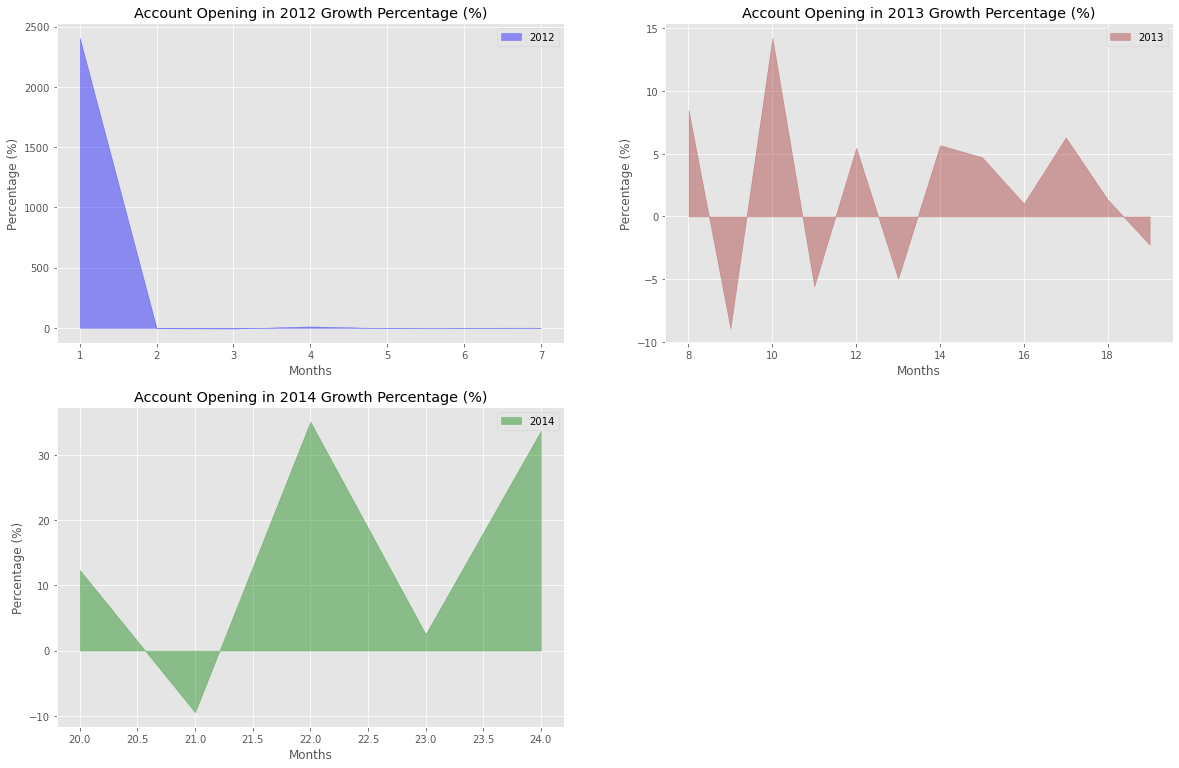

In [400]:
plt.figure(figsize=(20, 20))
plt.subplot(321)
plt.fill_between(monthly_perform[monthly_perform.creation_year==2012].index, 
                 monthly_perform[monthly_perform.creation_year==2012].total_count_change_per, color='blue', alpha=0.4)
plt.legend(labels=[2012])
plt.xlabel('Months')
plt.ylabel('Percentage (%)')
plt.title('Account Opening in 2012 Growth Percentage (%)')

plt.subplot(322)
plt.fill_between(monthly_perform[monthly_perform.creation_year==2013].index, 
                 monthly_perform[monthly_perform.creation_year==2013].total_count_change_per, color='brown', alpha=0.4)
plt.legend(labels=[2013])
plt.xlabel('Months')
plt.ylabel('Percentage (%)')
plt.title('Account Opening in 2013 Growth Percentage (%)')

plt.subplot(323)
plt.fill_between(monthly_perform[monthly_perform.creation_year==2014].index, 
                 monthly_perform[monthly_perform.creation_year==2014].total_count_change_per, color='green', alpha=0.4)
plt.legend(labels=[2014])
plt.xlabel('Months')
plt.ylabel('Percentage (%)')
plt.title('Account Opening in 2014 Growth Percentage (%)')
plt.show()

### Observations
-----------------
1. In 25 Months period (2012-2014), the average growth rate of account opening is 104.57%.
2. Most of the accounts were opened in year 2013, as it was full year compared to 2012 & 2014.
3. Max. accounts were opend in Dec. 2012, Nov.2013, May 2014.
4. Highest avg. percentage of account opened monthly was 20% in 2014. While highest avg. account opened yearly was 47.3% in 2013.

## 4.2 Multiple account users

## 4.3 Invitation Analysis

In [401]:
df1.creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [402]:
# Percentage of accounts opened through Invitations ('GUEST_INVITE', 'ORG_INVITE')
((df1.shape[0]-df1.invited_by_user_id.isna().sum()) / df1.shape[0] * 100).round(2)

53.47

In [403]:
# Percentage of accounts opened through Invitations ('SIGNUP', 'PERSONAL_PROJECTS', 'SIGNUP_GOOGLE_AUTH')
((df1.invited_by_user_id.isna().sum()) / df1.shape[0] * 100).round(2)

46.52

### 4.3.1 Types of Invitations

In [404]:
df_cs = df1.creation_source.value_counts().reset_index(name='total')
df_cs['percentage'] = (df_cs.total/df_cs.total.sum()*100).round(2)
df_cs

,index,total,percentage
0,ORG_INVITE,4254,35.45
1,GUEST_INVITE,2163,18.02
2,PERSONAL_PROJECTS,2111,17.59
3,SIGNUP,2087,17.39
4,SIGNUP_GOOGLE_AUTH,1385,11.54


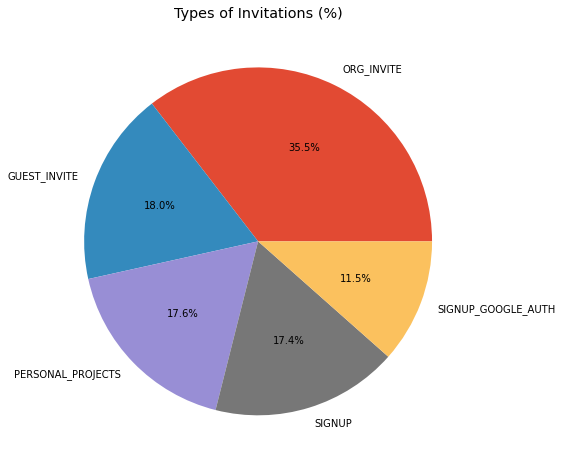

In [405]:
# Percentage of each invitation (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(df_cs.percentage, labels=df_cs['index'], autopct='%1.1f%%')
plt.title('Types of Invitations (%)')
plt.show()

### 4.3.2 Invitation by UserID

In [437]:
df1.invited_by_user_id.value_counts().head(10)

10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
7012.0     10
4803.0     10
6370.0     10
4302.0     10
1175.0     10
Name: invited_by_user_id, dtype: int64

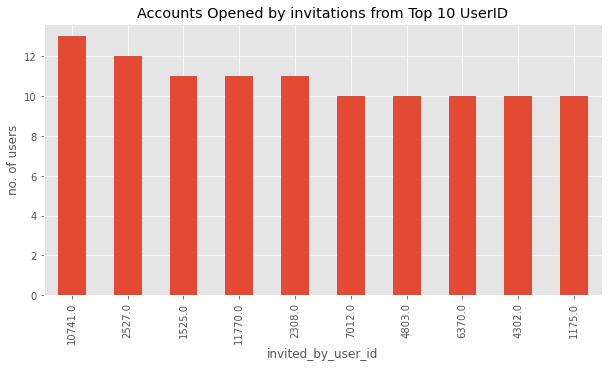

In [438]:
plt.figure(figsize=(10, 5))
df1.invited_by_user_id.value_counts().head(10).plot(kind='bar', xlabel='invited_by_user_id', ylabel='no. of users')
plt.title('Accounts Opened by invitations from Top 10 UserID')
plt.show()

In [451]:
# Top UserID invitation account creation source are
id = df1.invited_by_user_id.value_counts().head(10).index
df1[df1.invited_by_user_id.isin(id)].creation_source.value_counts()

ORG_INVITE      74
GUEST_INVITE    34
Name: creation_source, dtype: int64

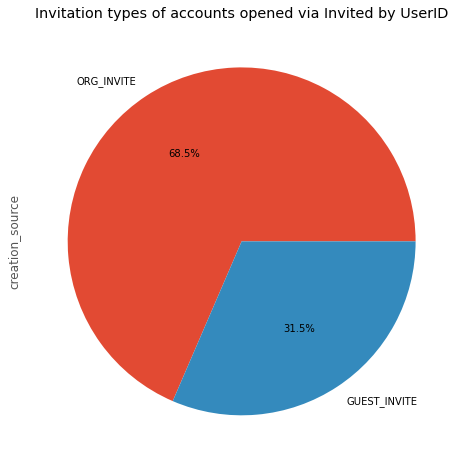

In [453]:
plt.figure(figsize=(8, 8))
df1[df1.invited_by_user_id.isin(id)].creation_source.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Invitation types of accounts opened via Invited by UserID')
plt.show()

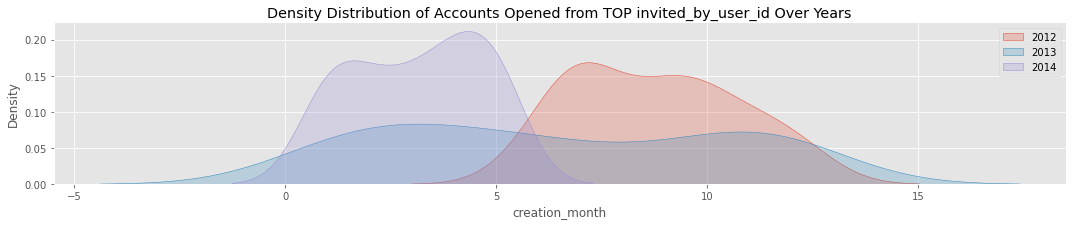

In [454]:
df_inv = df1[df1.invited_by_user_id.isin(id)]
# Year wise account opening density distribution plot
sns.FacetGrid(df_inv, hue='creation_year', aspect=5).map(sns.kdeplot, 'creation_month', shade=True)
plt.title('Density Distribution of Accounts Opened from TOP invited_by_user_id Over Years')
plt.legend(labels=[2012, 2013, 2014])
plt.show()

### Observation
-----------------
1. creation_source from 'SIGNUP', 'PERSONAL_PROJECTS', 'SIGNUP_GOOGLE_AUTH' are accounts opend without any invitation like 'GUEST_INVITE', 'ORG_INVITE'.
2. Most of the accounts opened were through ORG_INVITE & GUEST_INVITE.
3. Top 10 UserID that opened most accounts where mostly from Organization and Guests.
4. Accounts opened through top 10 UserID's were high during 2012 & 2014.

## 4.4 Mailing

### 4.4.1 Accounts opted for Mailing

In [406]:
df_op = df1.opted_in_to_mailing_list.value_counts().reset_index(name='total_count')
df_op['index'] = df_op['index'].replace([0, 1], ['Not Opted', "Opted"])
df_op

,index,total_count
0,Not Opted,9006
1,Opted,2994


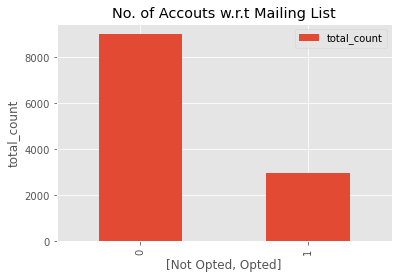

In [407]:
df_op.plot(kind='bar', xlabel=df_op['index'], ylabel='total_count', title='No. of Accouts w.r.t Mailing List')
plt.show()

### 4.4.2 Accounts opted for Marketing Drip

In [408]:
df_mk = df1.enabled_for_marketing_drip.value_counts().reset_index(name='total_count')
df_mk['index'] = df_mk['index'].replace([0, 1], ['Not Opted', "Opted"])
df_mk

,index,total_count
0,Not Opted,10208
1,Opted,1792


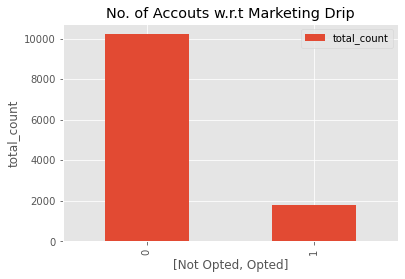

In [409]:
df_mk.plot(kind='bar', xlabel=df_mk['index'], ylabel='total_count', title='No. of Accouts w.r.t Marketing Drip')
plt.show()

### 4.4.3 Accounts Opted for Mailing list & Marketing Drip

In [410]:
df_op_mk = df1[(df1.opted_in_to_mailing_list == 1) & (df1.enabled_for_marketing_drip == 1)]
df_op_mk.head()

,object_id,creation_time,creation_year,creation_month,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
7,8,2013-07-31 05:34:02,2013,7,Hamilton Danielle,daniellehamilton@yahoo.com,PERSONAL_PROJECTS,2013-07-31 05:34:02,1,1,74,NaN
9,10,2013-01-16 22:08:03,2013,1,Santos Carla,carlaferreirasantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0
31,32,2013-04-17 16:21:30,2013,4,Perez Timothy,timothyjperez@yahoo.com,PERSONAL_PROJECTS,2013-04-17 16:21:30,1,1,98,NaN
46,47,2012-06-07 13:23:02,2012,6,Carrillo Hillary,hillaryjcarrillo@yahoo.com,ORG_INVITE,2012-06-08 13:23:02,1,1,32,11800.0
53,54,2013-03-17 12:31:27,2013,3,Nilsson Michelle,michellemnilsson@hotmail.com,GUEST_INVITE,2013-03-20 12:31:27,1,1,51,3876.0


In [411]:
# No. of Accounts Opned have actually Opted for Mailing list and Marketing Drip
df_op_mk.object_id.count()

1342

In [412]:
df_op_mk.creation_source.value_counts()

ORG_INVITE            490
SIGNUP                240
GUEST_INVITE          237
PERSONAL_PROJECTS     217
SIGNUP_GOOGLE_AUTH    158
Name: creation_source, dtype: int64

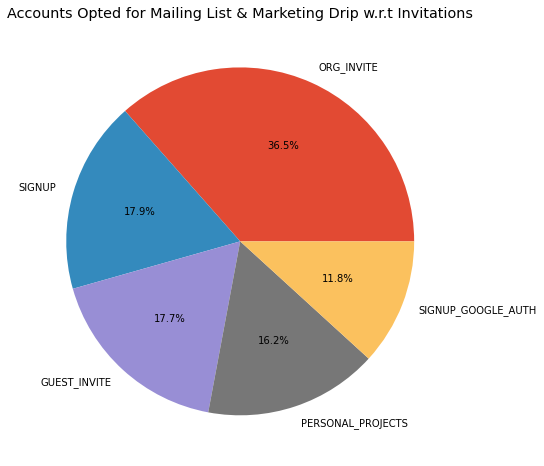

In [413]:
plt.figure(figsize=(8, 8))
plt.pie(df_op_mk.creation_source.value_counts(), labels=df_op_mk.creation_source.value_counts().index, autopct='%1.1f%%')
plt.title('Accounts Opted for Mailing List & Marketing Drip w.r.t Invitations')
plt.show()

### Observation
---------------
1. Only 2994 accounts have opted for Mailing List.
2. Only 1792 accounts have opted for Marketing Drip.
3. Totally 1342 accounts have opted for Both Mailing list & Marketing Drip.
4. Most of accounts who opted for both mailing are from ORG_INVITE invitation.

## 4.5 Organization-ID

In [414]:
# Replacing org_id with 0 to NaN
df1.org_id = df1.org_id.replace(0, np.nan)

In [415]:
# Number of Accounts not belonging to Organizations are
df1.org_id.isnull().sum()

319

In [416]:
# Top 10 org_id where acounts belong to
df1.org_id.value_counts().head(10)

1.0     233
2.0     201
3.0     168
4.0     159
6.0     138
5.0     128
9.0     124
7.0     119
10.0    104
8.0      97
Name: org_id, dtype: int64

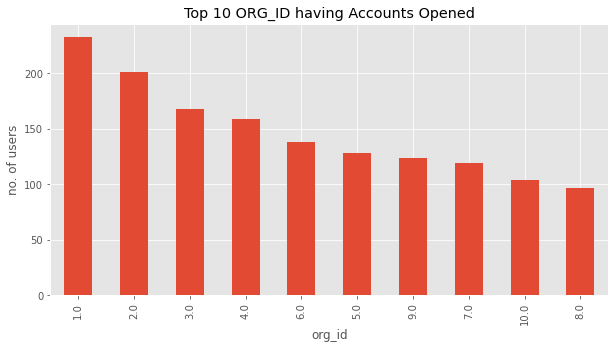

In [417]:
plt.figure(figsize=(10, 5))
df1.org_id.value_counts()[:8].plot(kind='bar', xlabel='org_id', ylabel='no. of users')
plt.title('Top 10 ORG_ID having Accounts Opened')
plt.show()

In [423]:
# Top Organization accounts creation source are
df1[df1.org_id<=10].creation_source.value_counts()

ORG_INVITE            533
GUEST_INVITE          269
PERSONAL_PROJECTS     267
SIGNUP                231
SIGNUP_GOOGLE_AUTH    171
Name: creation_source, dtype: int64

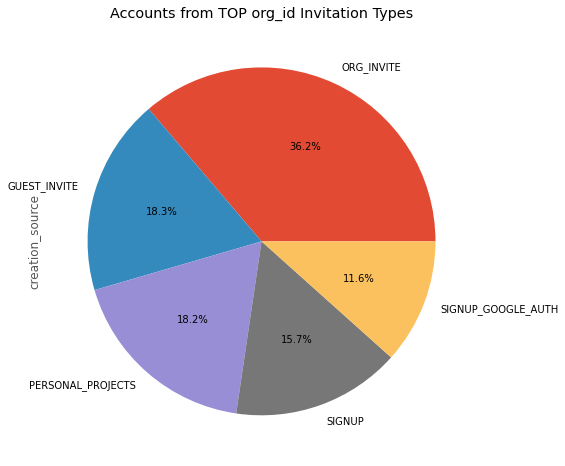

In [432]:
plt.figure(figsize=(8, 8))
df1[df1.org_id<=10].creation_source.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Accounts from TOP org_id Invitation Types')
plt.show()

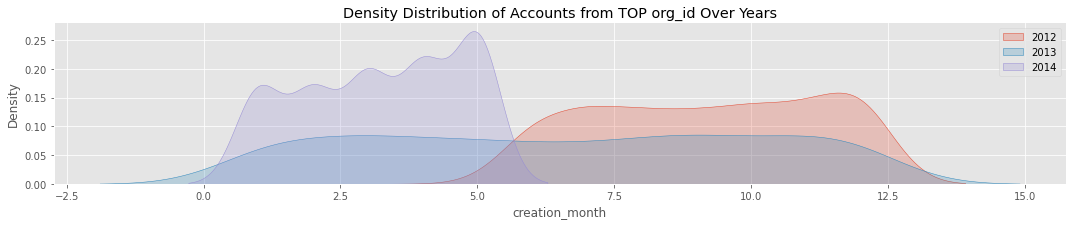

In [433]:
df_org = df1[df1.org_id<=10]
# Year wise account opening density distribution plot
sns.FacetGrid(df_org, hue='creation_year', aspect=5).map(sns.kdeplot, 'creation_month', shade=True)
plt.title('Density Distribution of Accounts from TOP org_id Over Years')
plt.legend(labels=[2012, 2013, 2014])
plt.show()

### Observation
--------------
1. Accounts not belonging to organization are 319.
2. Most of the accounts were opened from org_id 1 - 10.
3. Most of the accounts from top 10 organizations were opened via organizational & guest invitaions.
4. Most of accounts belonging to organizations were opened during 2014.

## 4.6 Logged timestamp

# ML Models